In [1]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm

from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
x = np.linspace(0., 1., 100)

# Various Degree Splines

In [3]:
y0 = dmatrix("bs(x, df=6, degree=0, include_intercept=True) - 1", {"x": x})
y1 = dmatrix("bs(x, df=6, degree=1, include_intercept=True) - 1", {"x": x})
y2 = dmatrix("bs(x, df=6, degree=2, include_intercept=True) - 1", {"x": x})
y3 = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})

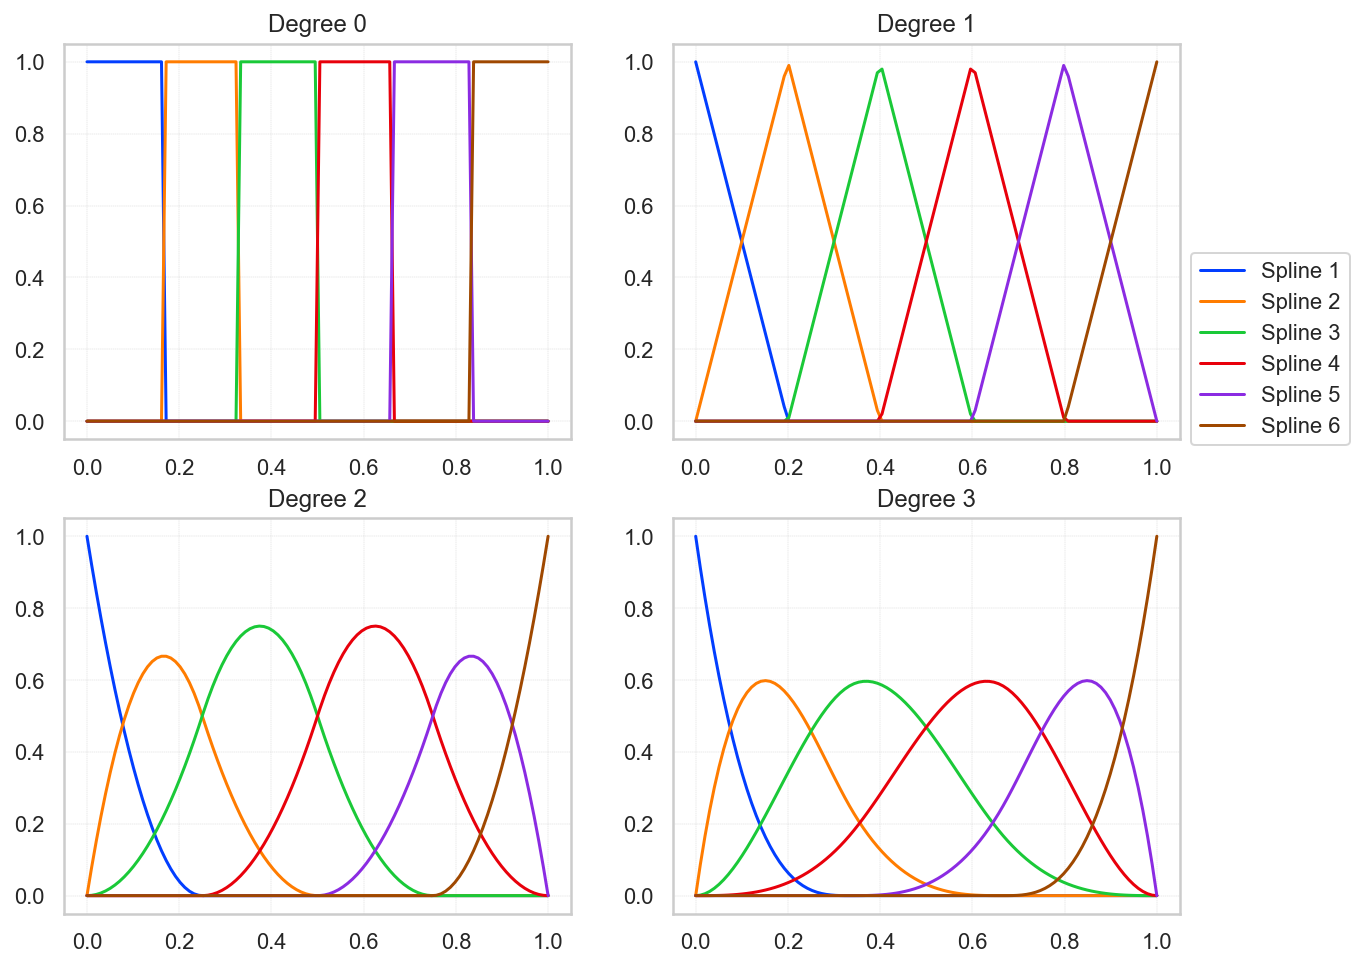

In [4]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0][0].plot(x, y0)
ax[0][0].grid(linestyle='--', linewidth='0.2')
ax[0][0].set_title('Degree 0')
for i in range(6):
    ax[0][1].plot(x, y1[:, i], label='Spline %d' % (i + 1))
ax[0][1].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
# ax[0][1].plot(x, y1)
ax[0][1].grid(linestyle='--', linewidth='0.2')
ax[0][1].set_title('Degree 1')
ax[1][0].plot(x, y2)
ax[1][0].grid(linestyle='--', linewidth='0.2')
ax[1][0].set_title('Degree 2')
ax[1][1].plot(x, y3)
ax[1][1].grid(linestyle='--', linewidth='0.2')
ax[1][1].set_title('Degree 3');
f.savefig('images/chapter_02_various_degree_splines.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_02_various_degree_splines.pdf', format='pdf', dpi=300, bbox_inches='tight');

# Linear Combination of Cubic Splines

In [5]:
y3 = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})

In [6]:
b0 = np.array([1, 1, 1, 1, 1, 1])
b1 = np.array([1.1, 0.4, 0.9, 0.8, 1.8, 0.6])

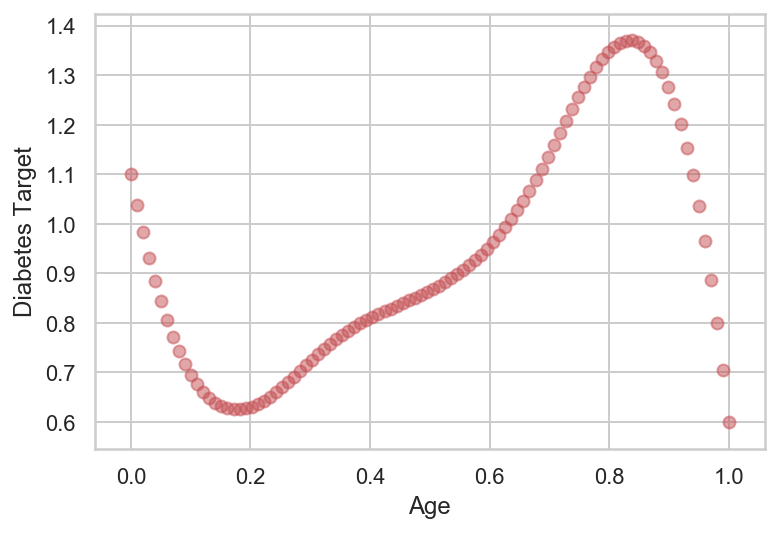

In [7]:
y_res = np.dot(y3, b1)
f, ax = plt.subplots()
ax.scatter(x, y_res, c='r', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Diabetes Target');
f.savefig('images/chapter_02_diagnostics+_diabetes_age_target.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_02_diagnostics+_diabetes_age_target.pdf', format='pdf', dpi=300, bbox_inches='tight');

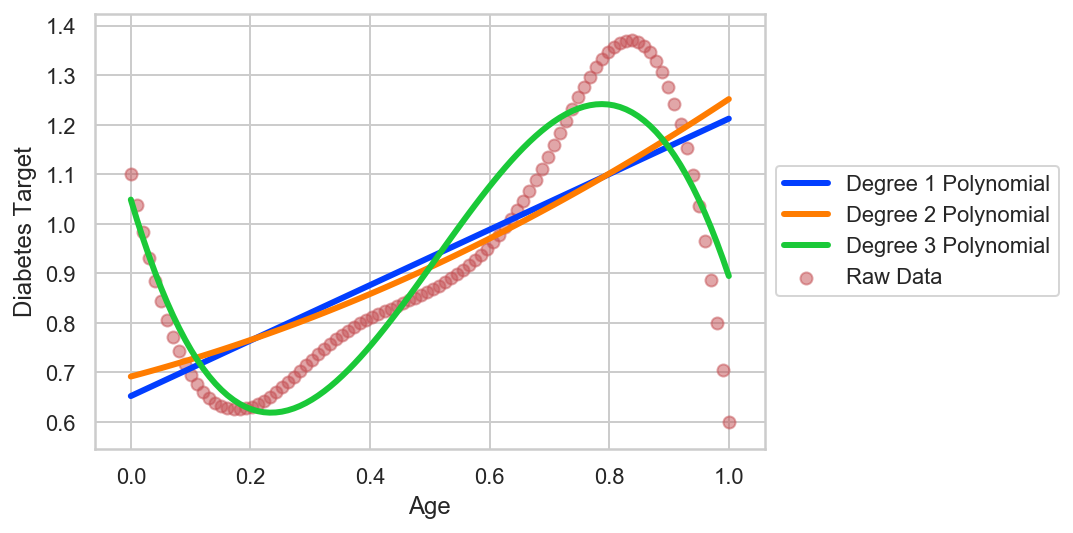

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y_res)
lr_pred = lr.predict(x.reshape(-1,1))
f, ax = plt.subplots()
ax.scatter(x, y_res, c='r', alpha=0.5, label='Raw Data')
ax.plot(x, lr_pred, linewidth=3, label='Degree 1 Polynomial')

pf_2 = PolynomialFeatures(degree=2)
x_2 = pf_2.fit_transform(x.reshape(-1, 1))
pf_3 = PolynomialFeatures(degree=3)
x_3 = pf_3.fit_transform(x.reshape(-1, 1))

lr_2 = LinearRegression()
lr_2.fit(x_2, y_res)
lr_3 = LinearRegression()
lr_3.fit(x_3, y_res)
lr_2_pred = lr_2.predict(x_2)
lr_3_pred = lr_3.predict(x_3)
ax.plot(x, lr_2_pred, linewidth=3, label='Degree 2 Polynomial')
ax.plot(x, lr_3_pred, linewidth=3, label='Degree 3 Polynomial')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age')
ax.set_ylabel('Diabetes Target')
f.savefig('images/chapter_02_diagnostics+_diabetes_poly_reg.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_02_diagnostics+_diabetes_poly_reg.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [9]:
y3_res = y3 * b1

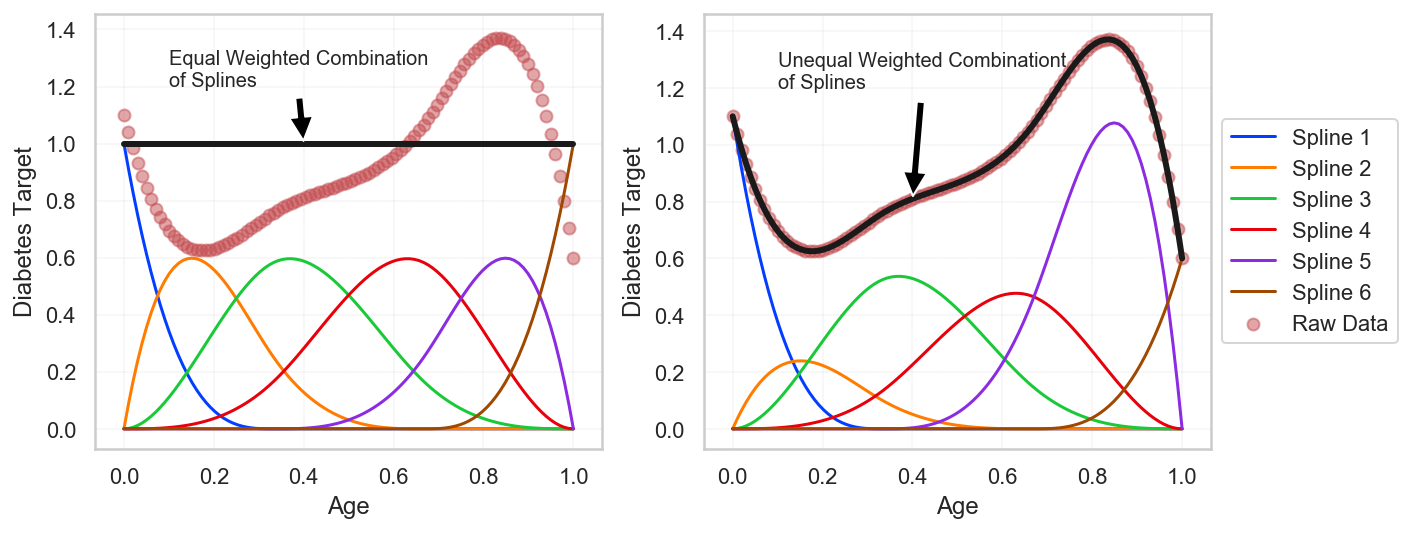

In [10]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(x, y3*b0)
ax[0].plot(x, np.dot(y3, b0), color='k', linewidth=3)
ax[0].annotate('Equal Weighted Combination\nof Splines', xy=(0.4, 1), xytext=(0.1, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            );
ax[0].scatter(x, y_res, c='r', alpha=0.5)
ax[0].grid(linestyle='--', linewidth='0.2')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Diabetes Target');
for i in range(6):
    ax[1].plot(x, y3_res[:, i], label='Spline %d' % (i + 1))
ax[1].plot(x, np.dot(y3, b1), color='k', linewidth=3)
ax[1].grid(linestyle='--', linewidth='0.2')
ax[1].scatter(x, y_res, c='r', alpha=0.5, label='Raw Data')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Diabetes Target')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].annotate('Unequal Weighted Combinationt\nof Splines', xy=(0.4, 0.8), xytext=(0.1, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            );
f.savefig('images/chapter_02_linear_comb_cubic_splines.png', dpi=300, bbox_inches='tight');
f.savefig('images/chapter_02_linear_comb_cubic_splines.pdf', format='pdf', dpi=300, bbox_inches='tight');